# **LOAD DATA**

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np


# Load dataset
df = pd.read_excel('stunting.xlsx')
print(df.head())

   Age  Weight  Height           TB/U Gender Birth Weight Birth Height
0   33    11.0    84.0         Pendek      L           3           48 
1   37    10.0    87.0         Pendek      L         3.1           50 
2   10     6.4    67.0         Pendek      P           3           48 
3    1     3.3    49.0  Sangat Pendek      P        2.95           47 
4   50    13.7    89.0  Sangat Pendek      P           3           49 


In [2]:
# Pengecekan Missing Value
missing_values = df.isnull().sum()
print("Missing Values per Kolom:")
print(missing_values)


Missing Values per Kolom:
Age             0
Weight          0
Height          0
TB/U            0
Gender          0
Birth Weight    0
Birth Height    0
dtype: int64


In [3]:
# Melihat informasi DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           193 non-null    int64  
 1   Weight        193 non-null    float64
 2   Height        193 non-null    float64
 3   TB/U          193 non-null    object 
 4   Gender        193 non-null    object 
 5   Birth Weight  193 non-null    object 
 6   Birth Height  193 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 10.7+ KB
None


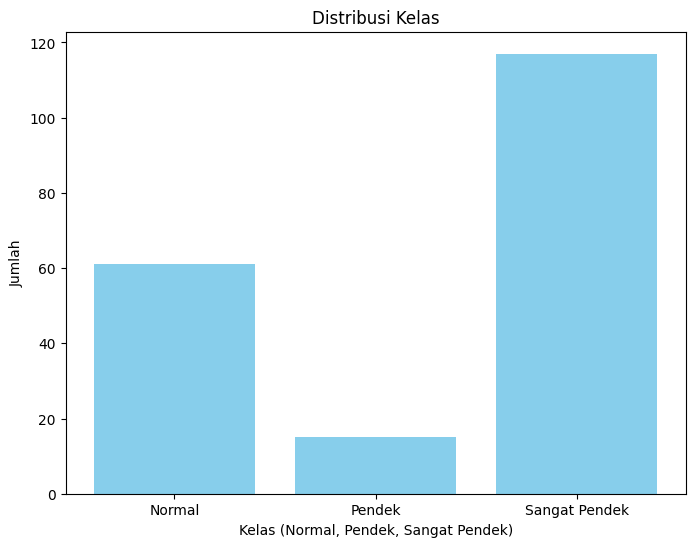

In [11]:
# Visualisasi distribusi kelas menggunakan bar plot
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder
# Cek distribusi kelas sebelum SMOTE
class_counts = Counter(df['TB/U'])

# Visualisasi distribusi kelas menggunakan bar plot
plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Distribusi Kelas')
plt.xlabel('Kelas (Normal, Pendek, Sangat Pendek)')
plt.ylabel('Jumlah')
plt.xticks([0, 1, 2], ['Normal', 'Pendek', 'Sangat Pendek'], rotation=0)
plt.show()

# **Encode & Pemilihan Fitur X,y**

In [6]:
# Step 2: Encode categorical target variable

label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['Gender'])


In [7]:
# Step 3: Define features and target
X = df[['Age', 'Weight', 'Height', 'gender_encoded', 'Birth Weight', 'Birth Height']]
y = df['TB/U']

# **SKENARIO SPLIITING DATA**

### split 60:40

In [5]:
# Step 4: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=125
)

### split 70:30

In [ ]:
# Step 4: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=125
)

### split 80:20

In [ ]:
# Step 4: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=125
)

### split 90:10

In [ ]:
# Step 4: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=125
)

# **TRAIN MODEL KNN DAN NB**

## K-Nearest Neighbor (KNN)

--- Hasil Performance KNN (Buruk) ---
Accuracy: 61.54%
Precision: 52.94%
Recall: 61.54%
F1 Score: 55.14%

Hasil Classification KNN:
               precision    recall  f1-score   support

       Normal       0.63      0.93      0.75        40
       Pendek       0.58      0.39      0.47        28
Sangat Pendek       0.00      0.00      0.00        10

     accuracy                           0.62        78
    macro avg       0.40      0.44      0.41        78
 weighted avg       0.53      0.62      0.55        78

Confusion Matrix KNN:
[[37  3  0]
 [17 11  0]
 [ 5  5  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


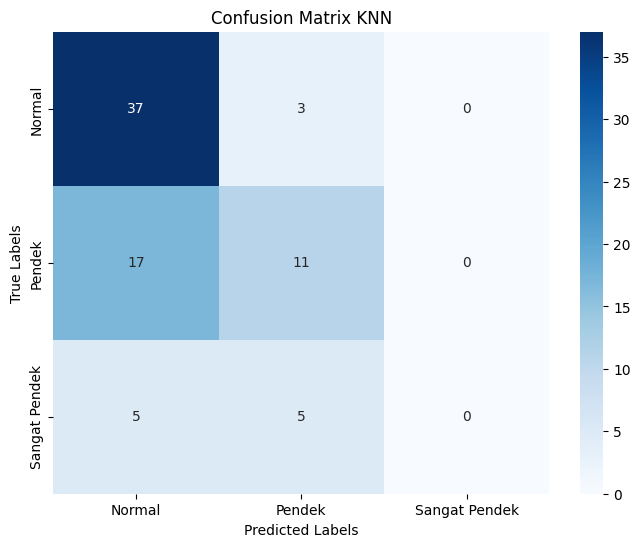

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
# 1. Model K-Nearest Neighbors dengan parameter yang buruk
knn = KNeighborsClassifier(n_neighbors=20)  # Menggunakan n_neighbors yang terlalu besar
knn.fit(X_train, y_train)

# Prediksi dengan KNN
y_pred_knn = knn.predict(X_test)

# Evaluasi KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted', zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)

# Output hasil evaluasi KNN
print("--- Hasil Performance KNN (Buruk) ---")
print(f"Accuracy: {accuracy_knn * 100:.2f}%")
print(f"Precision: {precision_knn * 100:.2f}%")
print(f"Recall: {recall_knn * 100:.2f}%")
print(f"F1 Score: {f1_knn * 100:.2f}%\n")
print("Hasil Classification KNN:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix KNN:")
print(confusion_matrix(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pendek', 'Sangat Pendek'], yticklabels=['Normal', 'Pendek', 'Sangat Pendek'])
plt.title('Confusion Matrix KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## Naive Bayes (NB)

--- Hasil Performance Naive Bayes ---
Accuracy: 67.95%
Precision: 71.06%
Recall: 67.95%
F1 Score: 63.85%

Hasil Classification Naive Bayes:
               precision    recall  f1-score   support

       Normal       0.70      0.93      0.80        40
       Pendek       0.62      0.54      0.58        28
Sangat Pendek       1.00      0.10      0.18        10

     accuracy                           0.68        78
    macro avg       0.77      0.52      0.52        78
 weighted avg       0.71      0.68      0.64        78

Confusion Matrix Naive Bayes:
[[37  3  0]
 [13 15  0]
 [ 3  6  1]]


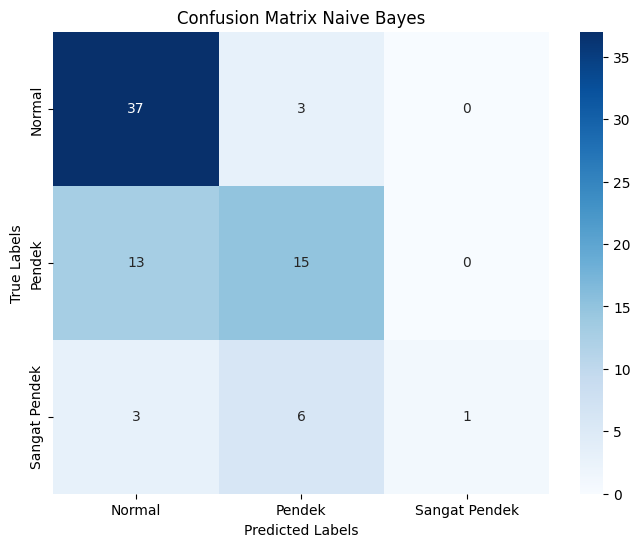

In [10]:
# 2. Model Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prediksi dengan Naive Bayes
y_pred_nb = nb.predict(X_test)

# Evaluasi Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted', zero_division=0)
recall_nb = recall_score(y_test, y_pred_nb, average='weighted', zero_division=0)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted', zero_division=0)

# Output hasil evaluasi Naive Bayes
print("--- Hasil Performance Naive Bayes ---")
print(f"Accuracy: {accuracy_nb * 100:.2f}%")
print(f"Precision: {precision_nb * 100:.2f}%")
print(f"Recall: {recall_nb * 100:.2f}%")
print(f"F1 Score: {f1_nb * 100:.2f}%\n")
print("Hasil Classification Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix Naive Bayes:")
print(confusion_matrix(y_test, y_pred_nb))

# Confusion Matrix untuk Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Visualisasi Confusion Matrix Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Pendek', 'Sangat Pendek'],
            yticklabels=['Normal', 'Pendek', 'Sangat Pendek'])
plt.title('Confusion Matrix Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()